# CS106AP Winter 2019 Section 8 SOLUTION

Alice, Bob, Charlie, and Diana all ate too much for dinner one night and agreed to go home and run for a bit to work off the excess calories. They all wear smartwatches that record their heart rates every second and used them while they exercised. Finally, they uploaded their heart rate data to the cloud to show each other that they in fact did work out. 

Unfortunately, two of the friends did not actually go running like they were supposed to, and to make matters worse, the cloud database experienced an error and mixed up all their data! We need your help to organize and clean up the data and ultimately find out who didn't do their exercise. 

## Problem 1

The first step is to parse through the file `mixed_heart_rates.csv` and store the data. 
The format of the data file is `name,time,heart_rate`, where `time` is the elapsed time in seconds from the beginning of their workout. 
Create a dictionary that maps names to a list of tuples, with the first element of the tuple being the time and the second element being the heart rate at that time. Don't worry about ordering yet!

In [13]:
# Parse through this file
filename = "jumbled_heart_rates.csv"
# Create a dictionary mapping names to tuples of (time,heart_rate)
name_to_heart_rates = {}
# YOUR CODE HERE
with open(filename) as f:
    lines = f.readlines()
for line in lines:
    split_line = line.split(",")
    name = split_line[0]
    time = int(split_line[1])
    heart_rate = float(split_line[2])
    if not name in name_to_heart_rates:
        name_to_heart_rates[name] = []
    name_to_heart_rates[name].append((time, heart_rate))


## Problem 2

Now that we have a dictionary containing the relevant data, it's time to organize it! Use a custom lambda sort to sort each list of tuples by the time elapsed. Don't create a new dictionary - just update the current dictionary keys with the new sorted lists, so `Alice` in `name_to_heart_rates` should now map to a list of tuples sorted by the time elapsed. Remember that it always helps to print out your result at the end of each step to make sure everything is running smoothly.

In [14]:
# Sort each list by time elapsed using a custom lambda sort
# YOUR CODE HERE
for name in name_to_heart_rates:
    name_to_heart_rates[name] = sorted(name_to_heart_rates[name], key = lambda x: x[0])


## Problem 3

Great! Everything's looking in order. Now, use a list comprehension to create a new list for each of the four friends that consists of just the heart rates in sorted order. Modify the provided `alice_heart_rates`, `bob_heart_rates`, etc., to be your final lists. 

In [18]:
# Generate a list of heart rates only for each person using a list comprehension
# YOUR CODE HERE
alice_heart_rates = [tup[1] for tup in name_to_heart_rates["alice"]]
bob_heart_rates = [tup[1] for tup in name_to_heart_rates["bob"]]
charlie_heart_rates = [tup[1] for tup in name_to_heart_rates["charlie"]]
diana_heart_rates = [tup[1] for tup in name_to_heart_rates["diana"]]

# Bonus: Create a list of lists of final heart rates using a nested list comprehension!
final_heart_rates = [[tup[1] for tup in name_to_heart_rates[name]] for name in name_to_heart_rates]
# What information do we lose with this method?
# Answer: We no longer know the name associated with each list, 
# since the dictionary keys are given to us in a random order.




## Putting it all together

Finally, we can graph our resulting lists to expose the culprits once and for all! Just run the following code block - you don't need to change anything else.

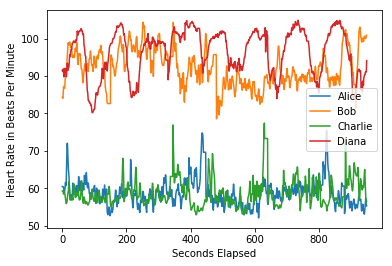

In [19]:
# plot the graphs!
import matplotlib.pyplot as plt

plt.plot(alice_heart_rates, label='Alice')
plt.plot(bob_heart_rates, label='Bob')
plt.plot(charlie_heart_rates, label='Charlie')
plt.plot(diana_heart_rates, label='Diana')
plt.xlabel("Seconds Elapsed")
plt.ylabel("Heart Rate in Beats Per Minute")
plt.legend()
plt.show()

Who were the two friends who didn't exercise? 

**Answer: Alice and Charlie**

Who did exercise? 

**Answer: Bob and Diana**